# Derivations for the Castro Simplified-SDC Solver


In [12]:
from sympy import init_session
init_session()

IPython console for SymPy 1.6.2 (Python 3.8.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



## Jacobian

We want to compute the Jacobian $\partial w/\partial \mathcal{U}$ with

$\mathcal{U} = (\rho X_\alpha, \rho X_\beta, \rho E, \rho e)^\intercal$

$w = (\rho, X_\alpha, X_\beta, T)^\intercal$

We'll start by writing down

$A = \partial \mathcal{U}/\partial w$

and then find its inverse

In [13]:
r, E, e, Xa, Xb, U, K = symbols(r"rho E e X_{\alpha} X_{\beta} U K")
dedr, dedT, dedXa, dedXb = symbols(r"\frac{\partial{}e}{\partial\rho} \frac{\partial{}e}{\partial{}T} " +
                                   r"\frac{\partial{}e}{\partial{}X_{\alpha}} \frac{\partial{}e}{\partial{}X_{\beta}}")

In [14]:
A = Matrix(
    [[Xa, r, 0, 0],
     [Xb, 0, r, 0],
     [e + r*dedr + Rational(1, 2)*U**2, r*dedXa, r*dedXb, r*dedT],     
     [e + r*dedr, r*dedXa, r*dedXb, r*dedT]])

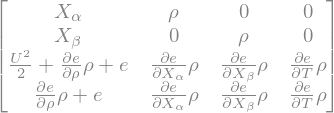

In [15]:
A

The inverse of $A$ is $\partial w/\partial \mathcal{U}$

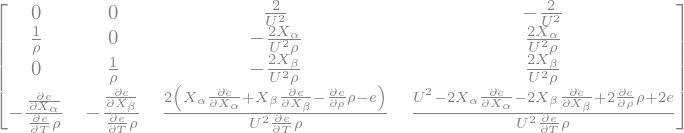

In [16]:
simplify(A.inv())


Compare to the form of the matrix with total energy in the full SDC algorithm

In [17]:
A = Matrix(
    [[1, 0, 0, 0],
     [Xa, r, 0, 0],
     [Xb, 0, r, 0],
     [e + r*dedr + Rational(1, 2)*U**2, r*dedXa, r*dedXb, r*dedT]])

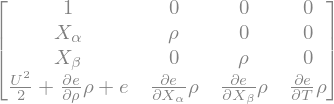

In [18]:
A

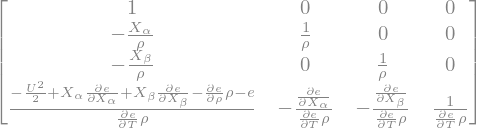

In [19]:
simplify(A.inv())

## Second Attempt

This adds rho to $\mathcal{U}$ and the kinetic energy to $w$:

$\mathcal{U} = (\rho, \rho_\alpha, \rho X_\beta, \rho E, \rho e)^\intercal$

$w = (\rho, X_\alpha, X_\beta, K, T)^\intercal$


In [20]:
A = Matrix(
    [[1, 0, 0, 0, 0],
     [Xa, r, 0, 0, 0],
     [Xb, 0, r, 0, 0],
     [e + r*dedr + K, r*dedXa, r*dedXb, r, r*dedT],     
     [e + r*dedr, r*dedXa, r*dedXb, 0, r*dedT]])

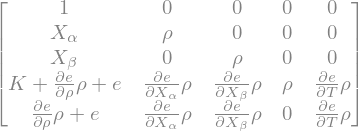

In [21]:
A

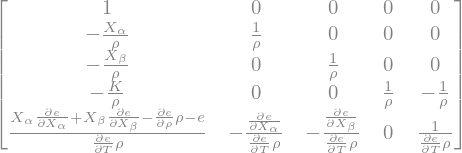

In [22]:
simplify(A.inv())

## Third Attempt

This switches $T$ to $e$ in the reactive system.

$\mathcal{U} = (\rho, \rho_\alpha, \rho X_\beta, \rho E, \rho e)^\intercal$

$w = (\rho, X_\alpha, X_\beta, K, e)^\intercal$


In [25]:
A = Matrix(
    [[1, 0, 0, 0, 0],
     [Xa, r, 0, 0, 0],
     [Xb, 0, r, 0, 0],
     [e + K, r*dedXa, r*dedXb, r, r],     
     [e, r*dedXa, r*dedXb, 0, r]])

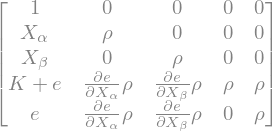

In [26]:
A

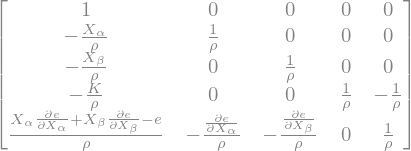

In [27]:
simplify(A.inv())